In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Dados

In [3]:
path = kagglehub.dataset_download("muratkokludataset/pumpkin-seeds-dataset")

print("Path to dataset files:", path)

100%|██████████| 393k/393k [00:00<00:00, 563kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/pumpkin-seeds-dataset/versions/1


In [4]:
sub_dir = os.listdir(path)[0]
actual_data_path = os.path.join(path, sub_dir)

files_in_sub_dir = os.listdir(actual_data_path)
excel_files = [f for f in files_in_sub_dir if f.endswith('.xlsx')]

if not excel_files:
    raise FileNotFoundError(f"Nenhum arquivo .xlsx encontrado em {actual_data_path}")

excel_file_name = excel_files[0]
full_path = os.path.join(actual_data_path, excel_file_name)

In [5]:
df = pd.read_excel(full_path)

print(f"Arquivo carregado: {excel_file_name}")
display(df.head())

Arquivo carregado: Pumpkin_Seeds_Dataset.xlsx


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


## Normalização dos Dados

In [6]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.columns[:-1]

scaler = MinMaxScaler()

df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame com colunas numéricas normalizadas:")
display(df_normalized.head())

DataFrame com colunas numéricas normalizadas:


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.094060,0.028593,0.015551,0.443011,0.094037,0.121346,0.538377,0.944591,0.766869,0.887532,0.166458,0.755304,Çerçevelik
1,0.323710,0.288960,0.282492,0.534065,0.321202,0.384261,0.735526,0.963061,0.683352,0.751688,0.316881,0.546062,Çerçevelik
2,0.267208,0.310438,0.337143,0.383178,0.269913,0.323187,0.839474,0.885224,0.752212,0.552727,0.459187,0.383900,Çerçevelik
3,0.208936,0.178831,0.178027,0.457938,0.208314,0.257917,0.702193,0.944591,0.751106,0.763636,0.283560,0.585876,Çerçevelik
4,0.204975,0.187652,0.184843,0.444415,0.208303,0.253390,0.716228,0.875989,0.573009,0.725195,0.296938,0.566405,Çerçevelik


## Análise dos dados

In [7]:
X = df_normalized.drop('Class', axis=1).values
y_text = df_normalized['Class'].values

In [8]:
le = LabelEncoder()
y = le.fit_transform(y_text)

In [9]:
print(f'X.shape = {X.shape}, y.shape = {y.shape}')

X.shape = (2500, 12), y.shape = (2500,)


In [10]:
unique = np.unique(y, return_counts=True)
for label, qt_label in zip(unique[0], unique[1]):

    original_name = le.inverse_transform([label])[0]
    print(f'Label: {label} ({original_name}) \t Counts: {qt_label}')

Label: 0 (Çerçevelik) 	 Counts: 1300
Label: 1 (Ürgüp Sivrisi) 	 Counts: 1200


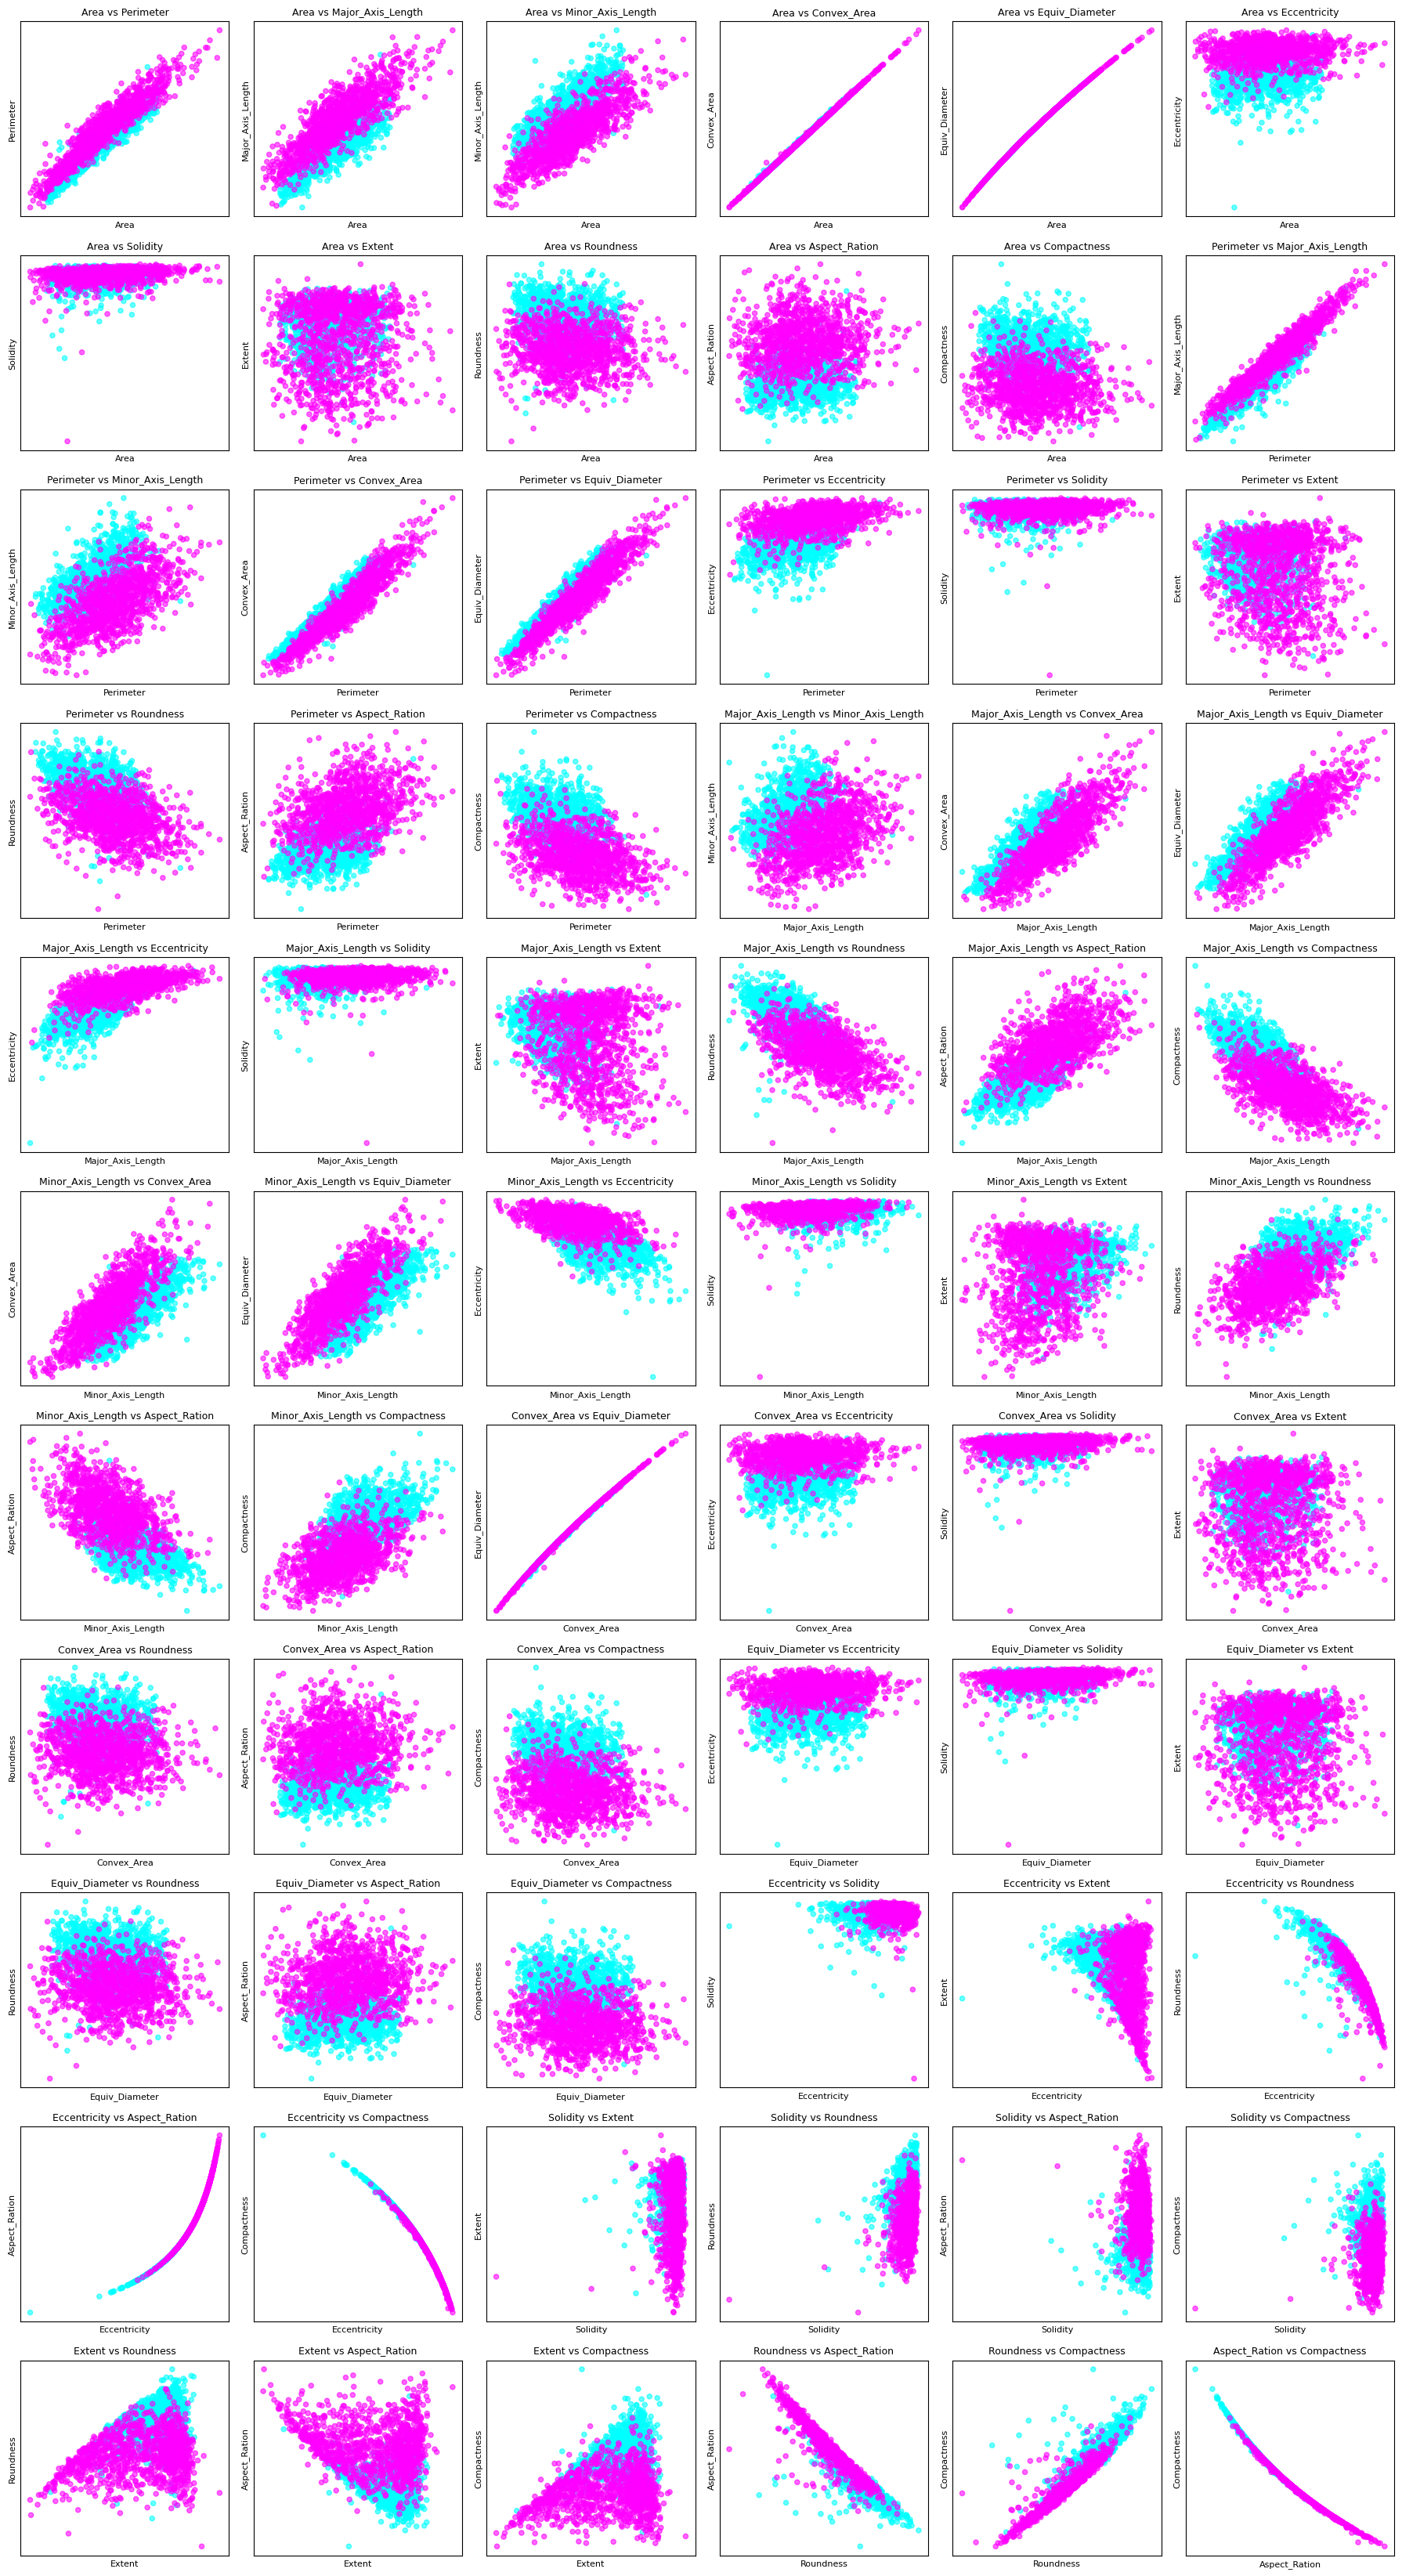

In [11]:
import matplotlib.pyplot as plt
import itertools

feature_names = df_normalized.columns[:-1]
num_features = len(feature_names)

feature_combinations = list(itertools.combinations(range(num_features), 2))

num_plots = len(feature_combinations)

n_cols = 6
n_rows = (num_plots + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 3, n_rows * 3))

combinations_list = []

for i, (idx1, idx2) in enumerate(feature_combinations):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(X[:, idx1], X[:, idx2], c=y, s=20, alpha=0.6, cmap='cool')

    plt.xlabel(feature_names[idx1], fontsize=8)
    plt.ylabel(feature_names[idx2], fontsize=8)
    plt.title(f'{feature_names[idx1]} vs {feature_names[idx2]}', fontsize=9)

    plt.xticks([])
    plt.yticks([])

    combinations_list.append(f'{feature_names[idx1]} vs {feature_names[idx2]}')

plt.tight_layout()
plt.show()


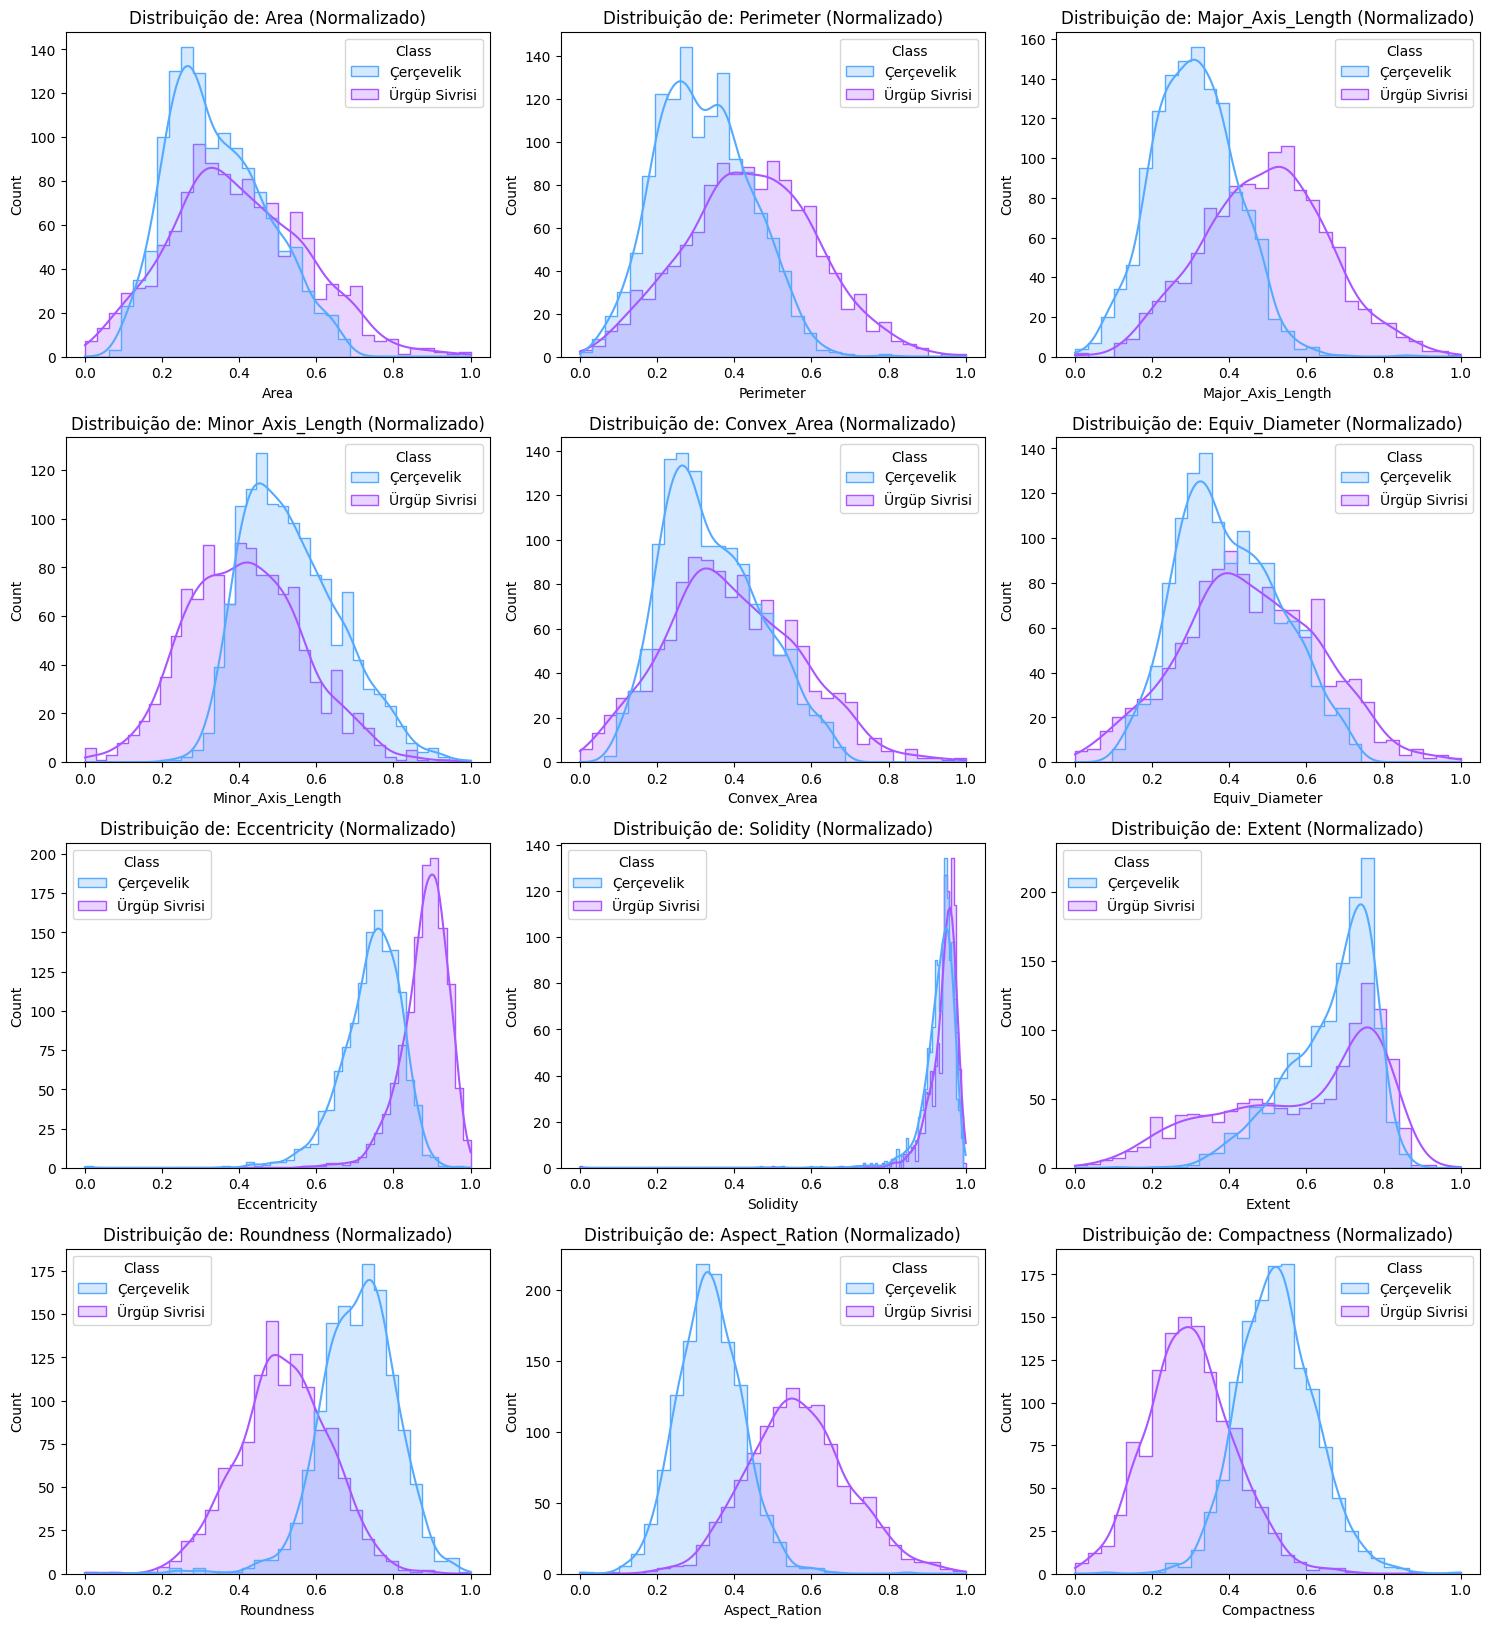

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df_normalized.columns[:-1]

plt.figure(figsize=(15, 20))

for i, col in enumerate(features):
    plt.subplot(5, 3, i + 1)
    sns.histplot(data=df_normalized, x=col, hue='Class', kde=True, element="step", palette='cool')

    plt.title(f'Distribuição de: {col} (Normalizado)')

plt.tight_layout()
plt.show()

## RFE (Recursive Feature Elimination)

Para saber a importancia de cada caracteristica


--- Importância das Features (Score mais alto = Melhor) ---


,Feature,Score
11,Compactness,2795.022444
10,Aspect_Ration,2716.923219
6,Eccentricity,2390.900770
9,Roundness,2029.403166
2,Major_Axis_Length,1149.965997
3,Minor_Axis_Length,479.679978
1,Perimeter,443.634119
8,Extent,147.434883
0,Area,74.593266
4,Convex_Area,72.577417


/tmp/ipython-input-1183001817.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=scores_df, palette='viridis')


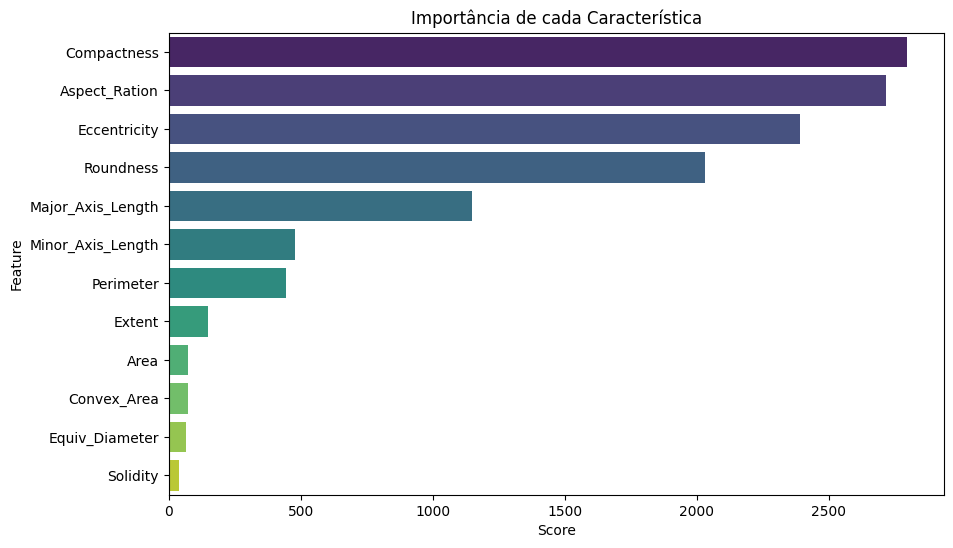

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

scores_df = pd.DataFrame({'Feature': df_normalized.columns[:-1], 'Score': fit.scores_})
scores_df = scores_df.sort_values(by='Score', ascending=False)

print("\n--- Importância das Features (Score mais alto = Melhor) ---")
display(scores_df)


plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=scores_df, palette='viridis')
plt.title('Importância de cada Característica')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

x_full_normalized = df_normalized.drop('Class', axis=1).values

X_train, X_temp, y_train, y_temp = train_test_split(x_full_normalized, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Treino: {X_train.shape} | Validação: {X_val.shape} | Teste: {X_test.shape}")

Treino: (1750, 12) | Validação: (375, 12) | Teste: (375, 12)


# Shallow Neural Network

## Modelo

- Inicialização dos pesos e bias
- Feedforward
- Calculo da perda
- Backpropagation
- Fit

In [15]:
class NnModel:
    def __init__(self, x: np.ndarray, y: np.ndarray, hidden_neurons: int = 20, output_neurons: int = 2, reg_lambda: float = 0.01):
        np.random.seed(42)
        self.x = x
        self.y = y
        self.m = x.shape[0]
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.input_neurons = self.x.shape[1]
        self.reg_lambda = reg_lambda

        self.W1 = np.random.randn(self.input_neurons, self.hidden_neurons) * np.sqrt(2. / self.input_neurons)
        self.B1 = np.zeros((1, self.hidden_neurons))
        self.W2 = np.random.randn(self.hidden_neurons, self.output_neurons) * np.sqrt(2. / self.hidden_neurons)
        self.B2 = np.zeros((1, self.output_neurons))

        self.best_W1 = self.W1.copy()
        self.best_B1 = self.B1.copy()
        self.best_W2 = self.W2.copy()
        self.best_B2 = self.B2.copy()

    def forward(self, x: np.ndarray):

        z1 = x.dot(self.W1) + self.B1
        f1 = np.maximum(0, z1)

        z2 = f1.dot(self.W2) + self.B2

        exp_values = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
        softmax = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return softmax, z1, f1

    def loss(self, softmax, y_target, w1, w2):
        m_local = y_target.shape[0]
        correct_logprobs = -np.log(softmax[range(m_local), y_target] + 1e-9)
        data_loss = np.sum(correct_logprobs) / m_local

        reg_loss = (self.reg_lambda / (2 * m_local)) * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
        return data_loss + reg_loss

    def backpropagation(self, softmax: np.ndarray, z1: np.ndarray, f1: np.ndarray, lr: float) -> None:

        delta2 = np.copy(softmax)
        delta2[range(self.m), self.y] -= 1

        dW2 = (f1.T).dot(delta2) / self.m + (self.reg_lambda / self.m) * self.W2
        dB2 = np.sum(delta2, axis=0, keepdims=True) / self.m

        dRelu = (z1 > 0).astype(float)
        delta1 = delta2.dot(self.W2.T) * dRelu

        dW1 = (self.x.T).dot(delta1) / self.m + (self.reg_lambda / self.m) * self.W1
        dB1 = np.sum(delta1, axis=0, keepdims=True) / self.m

        self.W1 -= lr * dW1
        self.B1 -= lr * dB1
        self.W2 -= lr * dW2
        self.B2 -= lr * dB2

    def predict(self, x):
        output, _, _ = self.forward(x)
        return np.argmax(output, axis=1)

    def fit(self, x_val, y_val, epochs: int, lr: float, patience: int = 50):
        history = {'loss_train': [], 'acc_train': [], 'loss_val': [], 'acc_val': []}
        best_val_loss = float('inf')
        patience_counter = 0

        print(f"Treinando com ReLU + Early Stopping (Paciência: {patience})")

        for epoch in range(epochs):
            # 1. Forward & Backprop (Treino)
            outputs, z1, f1 = self.forward(self.x)
            loss_train = self.loss(outputs, self.y, self.W1, self.W2)
            self.backpropagation(outputs, z1, f1, lr)

            # 2. Validação
            out_val, _, _ = self.forward(x_val)
            loss_val = self.loss(out_val, y_val, self.W1, self.W2)

            # 3. Métricas
            acc_train = accuracy_score(self.y, np.argmax(outputs, axis=1))
            acc_val = accuracy_score(y_val, np.argmax(out_val, axis=1))

            history['loss_train'].append(loss_train)
            history['loss_val'].append(loss_val)
            history['acc_train'].append(acc_train)
            history['acc_val'].append(acc_val)

            if loss_val < best_val_loss:
                best_val_loss = loss_val
                self.best_W1, self.best_B1 = self.W1.copy(), self.B1.copy()
                self.best_W2, self.best_B2 = self.W2.copy(), self.B2.copy()
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"\n--- Parada Antecipada na Época {epoch+1} ---")
                print(f"Melhor Val Loss foi: {best_val_loss:.4f}")
                break

            if (epoch+1) % 100 == 0:
                print(f'Epoch {epoch+1} | Train Loss: {loss_train:.4f} | Val Loss: {loss_val:.4f} | Val Acc: {acc_val:.3f}')

        self.W1, self.B1 = self.best_W1, self.best_B1
        self.W2, self.B2 = self.best_W2, self.best_B2

        return history

In [16]:
model = NnModel(X_train, y_train, hidden_neurons=30, output_neurons=2, reg_lambda=0.05)

history = model.fit(X_val, y_val, epochs=5000, lr=0.1, patience=100)

Treinando com ReLU + Early Stopping (Paciência: 100)
Epoch 100 | Train Loss: 0.3817 | Val Loss: 0.3922 | Val Acc: 0.837
Epoch 200 | Train Loss: 0.3364 | Val Loss: 0.3565 | Val Acc: 0.840
Epoch 300 | Train Loss: 0.3262 | Val Loss: 0.3511 | Val Acc: 0.843
Epoch 400 | Train Loss: 0.3220 | Val Loss: 0.3493 | Val Acc: 0.843
Epoch 500 | Train Loss: 0.3193 | Val Loss: 0.3481 | Val Acc: 0.843
Epoch 600 | Train Loss: 0.3173 | Val Loss: 0.3472 | Val Acc: 0.843
Epoch 700 | Train Loss: 0.3154 | Val Loss: 0.3459 | Val Acc: 0.843
Epoch 800 | Train Loss: 0.3136 | Val Loss: 0.3445 | Val Acc: 0.843
Epoch 900 | Train Loss: 0.3120 | Val Loss: 0.3431 | Val Acc: 0.845
Epoch 1000 | Train Loss: 0.3106 | Val Loss: 0.3418 | Val Acc: 0.848
Epoch 1100 | Train Loss: 0.3089 | Val Loss: 0.3403 | Val Acc: 0.851
Epoch 1200 | Train Loss: 0.3076 | Val Loss: 0.3387 | Val Acc: 0.848
Epoch 1300 | Train Loss: 0.3064 | Val Loss: 0.3374 | Val Acc: 0.848
Epoch 1400 | Train Loss: 0.3053 | Val Loss: 0.3362 | Val Acc: 0.853
Epoc

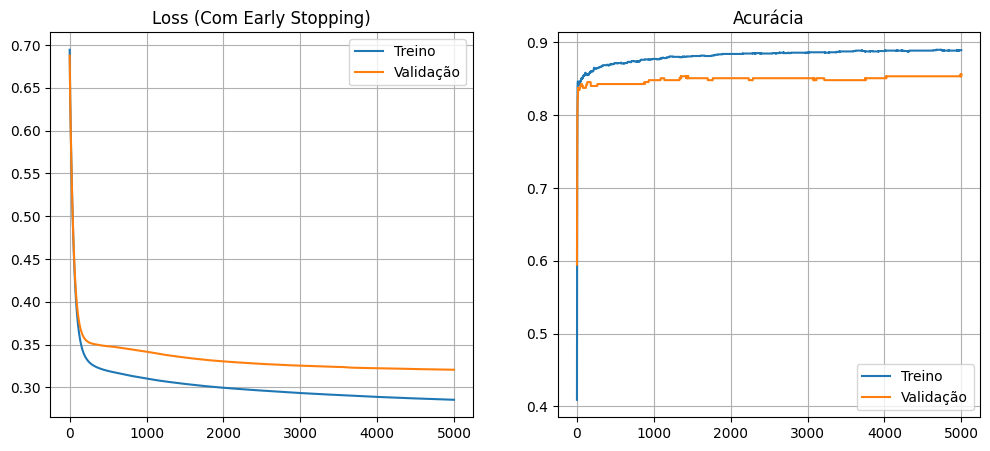


--- RESULTADO FINAL NO TESTE ---
Acurácia: 87.73%


In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['loss_train'], label='Treino')
plt.plot(history['loss_val'], label='Validação')
plt.title('Loss (Com Early Stopping)')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history['acc_train'], label='Treino')
plt.plot(history['acc_val'], label='Validação')
plt.title('Acurácia')
plt.legend()
plt.grid()
plt.show()

# 4. Teste Final
pred_test = model.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)
print(f"\n--- RESULTADO FINAL NO TESTE ---")
print(f"Acurácia: {acc_test:.2%}")

# Deep Learning Real (2 Camadas Ocultas)

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class NnModelDeep:
    def __init__(self, x: np.ndarray, y: np.ndarray, hidden1: int = 32, hidden2: int = 16, output: int = 2, reg_lambda: float = 0.01):
        np.random.seed(42)
        self.x = x
        self.y = y
        self.m = x.shape[0]
        self.reg_lambda = reg_lambda

        input_size = self.x.shape[1]

        # Camada 1
        self.W1 = np.random.randn(input_size, hidden1) * np.sqrt(2. / input_size)
        self.B1 = np.zeros((1, hidden1))

        # Camada 2
        self.W2 = np.random.randn(hidden1, hidden2) * np.sqrt(2. / hidden1)
        self.B2 = np.zeros((1, hidden2))

        # Camada Saída
        self.W3 = np.random.randn(hidden2, output) * np.sqrt(2. / hidden2)
        self.B3 = np.zeros((1, output))

    def forward(self, x: np.ndarray):
        # Layer 1
        z1 = x.dot(self.W1) + self.B1
        f1 = np.maximum(0, z1) # ReLU

        # Layer 2
        z2 = f1.dot(self.W2) + self.B2
        f2 = np.maximum(0, z2) # ReLU

        # Layer 3 (Output)
        z3 = f2.dot(self.W3) + self.B3

        # Softmax
        exp_values = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
        softmax = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        return softmax, f1, f2

    def loss(self, softmax, y_target):
        m_local = y_target.shape[0]
        correct_logprobs = -np.log(softmax[range(m_local), y_target] + 1e-9)
        data_loss = np.sum(correct_logprobs) / m_local

        # L2 Regularization
        reg_loss = (self.reg_lambda / (2 * m_local)) * (np.sum(self.W1**2) + np.sum(self.W2**2) + np.sum(self.W3**2))
        return data_loss + reg_loss

    def backpropagation(self, softmax, f1, f2, lr):
        # 1. Erro na Saída
        delta3 = np.copy(softmax)
        delta3[range(self.m), self.y] -= 1

        # Gradientes W3
        dW3 = f2.T.dot(delta3) / self.m + (self.reg_lambda / self.m) * self.W3
        dB3 = np.sum(delta3, axis=0, keepdims=True) / self.m

        # 2. Erro na Camada 2
        dRelu2 = (f2 > 0).astype(float)
        delta2 = delta3.dot(self.W3.T) * dRelu2

        # Gradientes W2
        dW2 = f1.T.dot(delta2) / self.m + (self.reg_lambda / self.m) * self.W2
        dB2 = np.sum(delta2, axis=0, keepdims=True) / self.m

        # 3. Erro na Camada 1
        dRelu1 = (f1 > 0).astype(float)
        delta1 = delta2.dot(self.W2.T) * dRelu1

        # Gradientes W1
        dW1 = self.x.T.dot(delta1) / self.m + (self.reg_lambda / self.m) * self.W1
        dB1 = np.sum(delta1, axis=0, keepdims=True) / self.m

        # Atualização
        self.W1 -= lr * dW1
        self.B1 -= lr * dB1
        self.W2 -= lr * dW2
        self.B2 -= lr * dB2
        self.W3 -= lr * dW3
        self.B3 -= lr * dB3

    def predict(self, x):
        output, _, _ = self.forward(x)
        return np.argmax(output, axis=1)

    def fit(self, x_val, y_val, epochs=5000, lr=0.1, patience=150):
        history = {'loss_train': [], 'loss_val': [], 'acc_val': []}
        best_val_loss = float('inf')
        patience_counter = 0

        # Salvar melhores pesos
        best_weights = {}

        for epoch in range(epochs):
            # Forward & Backprop
            outputs, f1, f2 = self.forward(self.x)
            loss_train = self.loss(outputs, self.y)
            self.backpropagation(outputs, f1, f2, lr)

            # Validação
            out_val, _, _ = self.forward(x_val)
            loss_val = self.loss(out_val, y_val)
            acc_val = accuracy_score(y_val, np.argmax(out_val, axis=1))

            history['loss_train'].append(loss_train)
            history['loss_val'].append(loss_val)
            history['acc_val'].append(acc_val)

            # Early Stopping
            if loss_val < best_val_loss:
                best_val_loss = loss_val
                patience_counter = 0
                best_weights = {
                    'W1': self.W1.copy(), 'B1': self.B1.copy(),
                    'W2': self.W2.copy(), 'B2': self.B2.copy(),
                    'W3': self.W3.copy(), 'B3': self.B3.copy()
                }
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Parada antecipada na época {epoch}")
                break

            if (epoch+1) % 500 == 0:
                print(f"Epoch {epoch+1} | Loss Tr: {loss_train:.4f} | Loss Val: {loss_val:.4f} | Acc Val: {acc_val:.3f}")

        # Restaurar melhor modelo
        self.W1, self.B1 = best_weights['W1'], best_weights['B1']
        self.W2, self.B2 = best_weights['W2'], best_weights['B2']
        self.W3, self.B3 = best_weights['W3'], best_weights['B3']

        return history

--- Treinando Rede Profunda (2 Camadas Ocultas) ---
Epoch 500 | Loss Tr: 0.3024 | Loss Val: 0.3349 | Acc Val: 0.845
Epoch 1000 | Loss Tr: 0.2926 | Loss Val: 0.3250 | Acc Val: 0.843
Parada antecipada na época 1216

ACURÁCIA NO TESTE: 88.27%


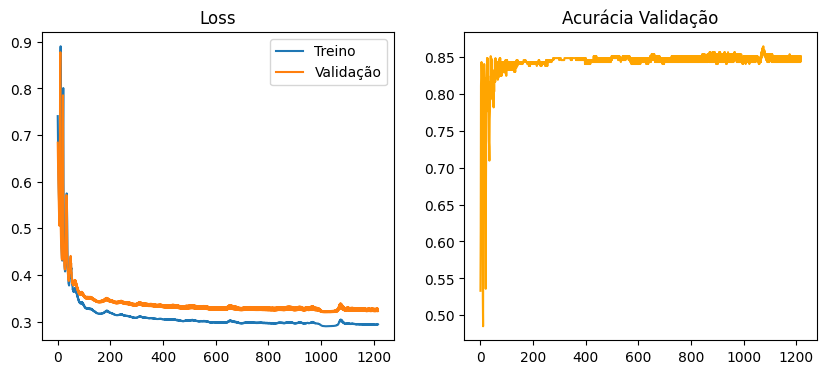

In [19]:
model = NnModelDeep(X_train, y_train, hidden1=32, hidden2=16, output=2, reg_lambda=0.005)

print("--- Treinando Rede Profunda (2 Camadas Ocultas) ---")
history = model.fit(X_val, y_val, epochs=8000, lr=0.2, patience=200)

# Avaliação Final
pred_test = model.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)

print(f"\nACURÁCIA NO TESTE: {acc_test:.2%}")

# Visualizar
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss_train'], label='Treino')
plt.plot(history['loss_val'], label='Validação')
plt.title('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history['acc_val'], color='orange')
plt.title('Acurácia Validação')
plt.show()

# N-Camadas Dinâmicas

Entrada (8 features)

64 Neurônios (Expansão)

32 Neurônios (Refinamento)

16 Neurônios (Compressão)

Saída (2 Classes)

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class NnModelDeepRobust:
    def __init__(self, layer_dims, reg_lambda=0.01):
        np.random.seed(42)
        self.layer_dims = layer_dims
        self.reg_lambda = reg_lambda
        self.parameters = {}
        self.velocities = {}
        self.L = len(layer_dims) - 1

        for l in range(1, self.L + 1):
            self.parameters['W' + str(l)] = np.random.randn(layer_dims[l-1], layer_dims[l]) * np.sqrt(2. / layer_dims[l-1])
            self.parameters['b' + str(l)] = np.zeros((1, layer_dims[l]))

            self.velocities['dW' + str(l)] = np.zeros_like(self.parameters['W' + str(l)])
            self.velocities['db' + str(l)] = np.zeros_like(self.parameters['b' + str(l)])

        self.best_parameters = {}

    def forward(self, X):
        caches = {}
        A = X
        caches['A0'] = X

        for l in range(1, self.L):
            W = self.parameters['W' + str(l)]
            b = self.parameters['b' + str(l)]
            Z = A.dot(W) + b
            A = np.maximum(0, Z)
            caches['Z' + str(l)] = Z
            caches['A' + str(l)] = A

        W_last = self.parameters['W' + str(self.L)]
        b_last = self.parameters['b' + str(self.L)]
        Z_last = A.dot(W_last) + b_last

        # Softmax
        exp_values = np.exp(Z_last - np.max(Z_last, axis=1, keepdims=True))
        AL = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        caches['Z' + str(self.L)] = Z_last
        caches['A' + str(self.L)] = AL

        return AL, caches

    def compute_loss(self, AL, Y):
        m = Y.shape[0]
        correct_logprobs = -np.log(AL[range(m), Y] + 1e-9)
        data_loss = np.sum(correct_logprobs) / m

        L2_cost = 0
        for l in range(1, self.L + 1):
            L2_cost += np.sum(np.square(self.parameters['W' + str(l)]))
        L2_cost *= (self.reg_lambda / (2 * m))

        return data_loss + L2_cost

    def backward(self, AL, Y, caches, lr, beta=0.9):
        m = Y.shape[0]
        dZ = AL.copy()
        dZ[range(m), Y] -= 1

        for l in range(self.L, 0, -1):
            A_prev = caches['A' + str(l-1)]
            W = self.parameters['W' + str(l)]

            # 1. Calcula Gradientes
            dW = (1./m) * A_prev.T.dot(dZ) + (self.reg_lambda/m) * W
            db = (1./m) * np.sum(dZ, axis=0, keepdims=True)

            # 2. Aplica Momentum
            # v = beta * v + (1-beta) * gradiente
            # W = W - lr * v
            self.velocities['dW' + str(l)] = beta * self.velocities['dW' + str(l)] + (1 - beta) * dW
            self.velocities['db' + str(l)] = beta * self.velocities['db' + str(l)] + (1 - beta) * db

            # 3. Atualiza Pesos
            self.parameters['W' + str(l)] -= lr * self.velocities['dW' + str(l)]
            self.parameters['b' + str(l)] -= lr * self.velocities['db' + str(l)]

            if l > 1:
                dA_prev = dZ.dot(W.T)
                Z_prev = caches['Z' + str(l-1)]
                dRelu = (Z_prev > 0).astype(float)
                dZ = dA_prev * dRelu

    def fit(self, X, y, X_val, y_val, epochs=5000, lr=0.01, patience=200):
        train_losses = []
        val_losses = []
        best_val_loss = float('inf')
        patience_cnt = 0

        print(f"Arquitetura: {self.layer_dims} | LR: {lr}")

        for i in range(epochs):
            AL, caches = self.forward(X)
            loss = self.compute_loss(AL, y)
            self.backward(AL, y, caches, lr)

            AL_val, _ = self.forward(X_val)
            val_loss = self.compute_loss(AL_val, y_val)

            train_losses.append(loss)
            val_losses.append(val_loss)

            # Early Stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_cnt = 0
                import copy
                self.best_parameters = copy.deepcopy(self.parameters)
            else:
                patience_cnt += 1

            if patience_cnt >= patience:
                print(f"Parada antecipada na época {i}")
                break

            if i % 500 == 0:
                acc = accuracy_score(y_val, np.argmax(AL_val, axis=1))
                print(f"Epoch {i} | Loss: {loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {acc:.4f}")

        self.parameters = self.best_parameters
        return train_losses, val_losses

    def predict(self, X):
        AL, _ = self.forward(X)
        return np.argmax(AL, axis=1)

--- Iniciando Treino Robusto ---
Arquitetura: [12, 64, 32, 16, 2] | LR: 0.01
Epoch 0 | Loss: 1.0410 | Val Loss: 1.0313 | Val Acc: 0.5200
Epoch 500 | Loss: 0.3310 | Val Loss: 0.3493 | Val Acc: 0.8453
Epoch 1000 | Loss: 0.3142 | Val Loss: 0.3443 | Val Acc: 0.8427
Epoch 1500 | Loss: 0.3075 | Val Loss: 0.3424 | Val Acc: 0.8427
Epoch 2000 | Loss: 0.3026 | Val Loss: 0.3398 | Val Acc: 0.8427
Epoch 2500 | Loss: 0.2988 | Val Loss: 0.3373 | Val Acc: 0.8427
Epoch 3000 | Loss: 0.2957 | Val Loss: 0.3343 | Val Acc: 0.8427
Epoch 3500 | Loss: 0.2931 | Val Loss: 0.3319 | Val Acc: 0.8480
Epoch 4000 | Loss: 0.2908 | Val Loss: 0.3301 | Val Acc: 0.8453
Epoch 4500 | Loss: 0.2889 | Val Loss: 0.3280 | Val Acc: 0.8453
Epoch 5000 | Loss: 0.2871 | Val Loss: 0.3262 | Val Acc: 0.8427
Epoch 5500 | Loss: 0.2853 | Val Loss: 0.3246 | Val Acc: 0.8480
Epoch 6000 | Loss: 0.2832 | Val Loss: 0.3232 | Val Acc: 0.8507
Epoch 6500 | Loss: 0.2816 | Val Loss: 0.3215 | Val Acc: 0.8507
Epoch 7000 | Loss: 0.2804 | Val Loss: 0.3206 

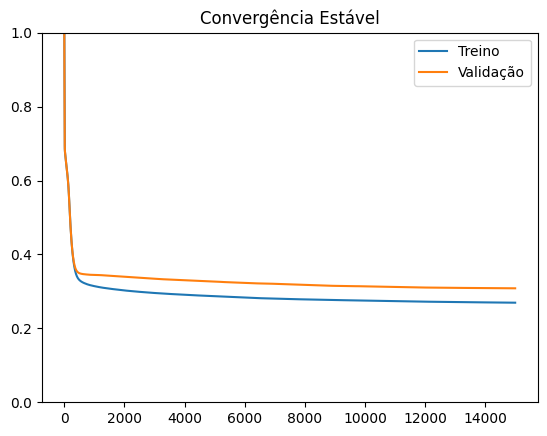

In [21]:
#Configurar arquitetura
# Funil Suave: 64 -> 32 -> 16
layers = [X_train.shape[1], 64, 32, 16, 2]
model_robust = NnModelDeepRobust(layers, reg_lambda=0.005)

print("--- Iniciando Treino Robusto ---")
t_loss, v_loss = model_robust.fit(X_train, y_train, X_val, y_val, epochs=15000, lr=0.01, patience=500)

pred_test = model_robust.predict(X_test)
acc_test = accuracy_score(y_test, pred_test)

print(f"\nACURÁCIA FINAL (TESTE): {acc_test:.2%}")

plt.plot(t_loss, label='Treino')
plt.plot(v_loss, label='Validação')
plt.ylim(0, 1)
plt.legend()
plt.title('Convergência Estável')
plt.show()